# Analyzing Data

## Prison Helicopter Escapes

We begin by importing some helper functions.

In [2]:
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes] (https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'

In [4]:
data = data_from_url(url)

Let's print the first three rows


In [5]:
for rows in data[1:4]:
    print(rows)

['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon", 'On October 31, 1973, an IRA member hijacked a helicopter and forced the pilot to land in the exercise yard of Dublin\'s Mountjoy Jail\'s D Wing at 3:40\xa0p.m., October 31, 1973. Three members of the IRA were able to escape: JB O\'Hagan, Seamus Twomey and Kevin Mallon. Another prisoner who also was in the prison was quoted as saying, "One shamefaced screw apologised to the governor and said he thought it was the new Minister for Defence (Paddy Donegan) arriving. I told him it was our Minister of Defence leaving." The Mountjoy helicopter escape became Republican lore and was immortalized by "The Helicopter Song", which contains the lines "It\'s up like a bird and over the city. There\'s three men a\'missing I heard the warder say".[1]']
['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson', "43-year-ol

In [6]:
index = 0

Eliminating the last column to make tha data shorter

In [7]:
for row in data:
    data[index] = row[:-1]
    index += 1

for row in data[:6]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']
['February 27, 1981', 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont']
['May 7, 1981', 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker)Giles Arseneault (prisoner)']
['January, 1983', 'Pentridge (HM Prison)', 'Australia', 'No', 'David McMillan']


In [8]:
i = 0
for row in data:
    row[0] = fetch_year(row[0]) 
    i += 1
    
for row in data[:6]:
    print(row)

[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
[1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
[1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']
[1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont']
[1981, 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker)Giles Arseneault (prisoner)']
[1983, 'Pentridge (HM Prison)', 'Australia', 'No', 'David McMillan']


# Prison Break according to a particular year

### finding the high and lowest year from data

In [9]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

#### making a list of year containing every year between high and low year

In [10]:
years = []
for year in range(min_year, max_year + 1):
    years.append(year)

In [11]:
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


#### initially assigning the number of attempts to 0 for every year

In [12]:
attempts_per_year = []
for year in years:
    attempts_per_year.append([year, 0])

In [13]:
print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


#### Finding the exact number of attempts for every years by matching year with that of variable 'data' and for every match incrementing by 1

In [14]:
for row in data:
    for year_attempt in attempts_per_year:
        if row[0] == year_attempt[0]:
            year_attempt[1] += 1
            
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


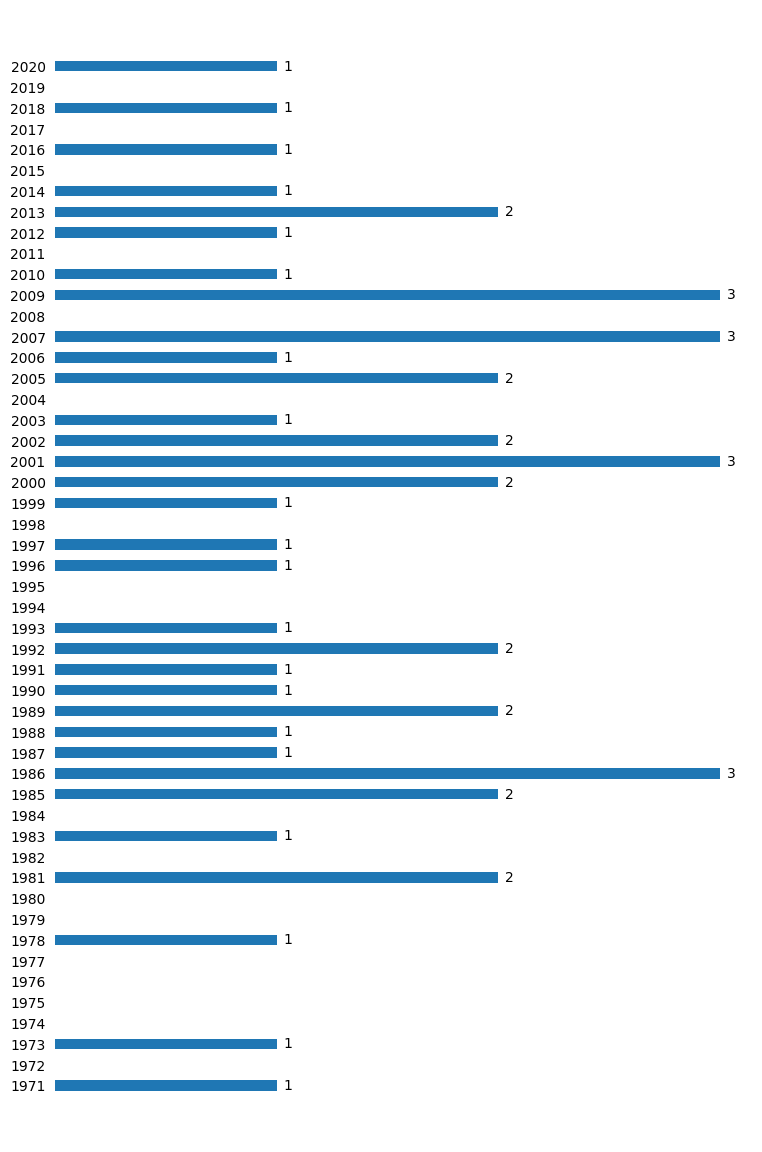

In [15]:
%matplotlib inline
barplot(attempts_per_year)

#### From the visualization we can observe that the most attempts of breaking out of prison with a helicopter was made in 1986 and 2001.

# Prison Break According to Country
### <i>Mine</i>

In [16]:
for row in data[:5]:
    print(row)

[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
[1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
[1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']
[1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont']
[1981, 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker)Giles Arseneault (prisoner)']


### Filtering every countries from the data

In [17]:
all_countries = []
for row in data:
    all_countries.append(row[2])

print(all_countries)

['Mexico', 'Ireland', 'United States', 'France', 'Canada', 'Australia', 'United States', 'Brazil', 'France', 'United States', 'Italy', 'United Kingdom', 'United States', 'United States', 'United States', 'Canada', 'Puerto Rico', 'France', 'France', 'France', 'Chile', 'Netherlands', 'Australia', 'United States', 'France', 'France', 'France', 'France', 'Brazil', 'United States', 'France', 'France', 'France', 'Greece', 'Belgium', 'France', 'Belgium', 'Greece', 'France', 'Belgium', 'United Kingdom', 'Russia', 'Greece', 'Canada', 'Canada', 'Greece', 'France', 'Belgium']


### Making new list of unique countries

In [18]:
countries_set = set(all_countries)
countries = list(countries_set)

In [19]:
print(countries)

['Belgium', 'Ireland', 'Canada', 'Brazil', 'Australia', 'Mexico', 'Russia', 'Puerto Rico', 'United States', 'United Kingdom', 'Netherlands', 'Greece', 'France', 'Chile', 'Italy']


### Performing the matching to assign attempts made

In [20]:
attempts_per_country = []
for country in countries:
    attempts_per_country.append([country, 0])

print(attempts_per_country)

[['Belgium', 0], ['Ireland', 0], ['Canada', 0], ['Brazil', 0], ['Australia', 0], ['Mexico', 0], ['Russia', 0], ['Puerto Rico', 0], ['United States', 0], ['United Kingdom', 0], ['Netherlands', 0], ['Greece', 0], ['France', 0], ['Chile', 0], ['Italy', 0]]


In [21]:
for row in data:
    for country_attempt in attempts_per_country:
        if country_attempt[0] == row[2]:
            country_attempt[1] += 1
            
print(attempts_per_country)

[['Belgium', 4], ['Ireland', 1], ['Canada', 4], ['Brazil', 2], ['Australia', 2], ['Mexico', 1], ['Russia', 1], ['Puerto Rico', 1], ['United States', 8], ['United Kingdom', 2], ['Netherlands', 1], ['Greece', 4], ['France', 15], ['Chile', 1], ['Italy', 1]]


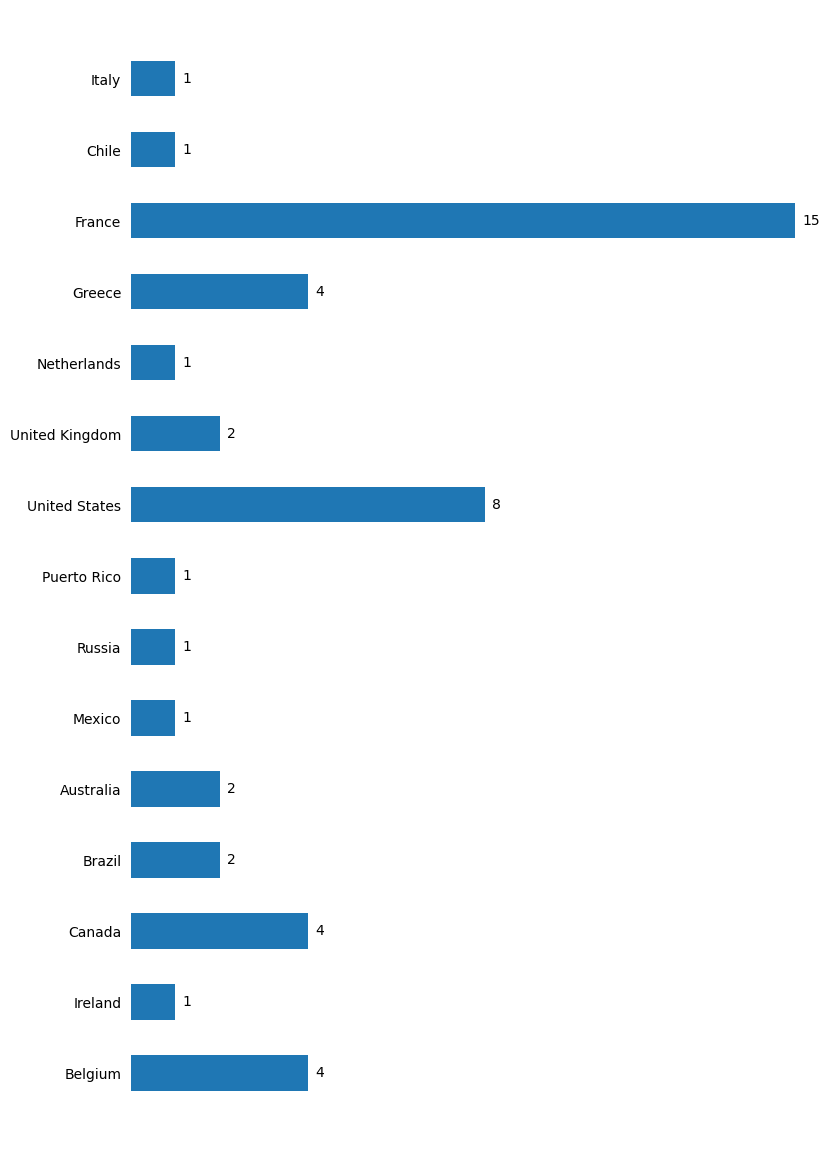

In [22]:
%matplotlib inline
barplot(attempts_per_country)

### <i>The most number of attempts were made by prisoners of France.</i>

# Prison Break According to the Country
### <i>Guided</i>

In [23]:
countries_frequency = df["Country"].value_counts()

In [24]:
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Greece,4
Canada,4
Belgium,4
United Kingdom,2
Australia,2
Brazil,2
Italy,1
Chile,1


## Same Result

# Extra Questions
## In which countries do helicopter prison breaks have a higher chance of success?


In [25]:
print(countries_frequency)

France            15
United States      8
Greece             4
Canada             4
Belgium            4
United Kingdom     2
Australia          2
Brazil             2
Italy              1
Chile              1
Netherlands        1
Russia             1
Puerto Rico        1
Mexico             1
Ireland            1
Name: Country, dtype: int64


In [26]:
type(countries_frequency)

pandas.core.series.Series

In [27]:
countries_frequency_list = list(countries_frequency)
print(countries_frequency_list)

[15, 8, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]


In [28]:
print(attempts_per_country)
print(countries)

[['Belgium', 4], ['Ireland', 1], ['Canada', 4], ['Brazil', 2], ['Australia', 2], ['Mexico', 1], ['Russia', 1], ['Puerto Rico', 1], ['United States', 8], ['United Kingdom', 2], ['Netherlands', 1], ['Greece', 4], ['France', 15], ['Chile', 1], ['Italy', 1]]
['Belgium', 'Ireland', 'Canada', 'Brazil', 'Australia', 'Mexico', 'Russia', 'Puerto Rico', 'United States', 'United Kingdom', 'Netherlands', 'Greece', 'France', 'Chile', 'Italy']


In [29]:
print(data[:5])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson'], [1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont'], [1981, 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker)Giles Arseneault (prisoner)']]


In [34]:
for elm in attempts_per_country:
    elm.append(0)
  
print(attempts_per_country)

[['Belgium', 4, 0, 0], ['Ireland', 1, 1, 0], ['Canada', 4, 0, 0], ['Brazil', 2, 0, 0], ['Australia', 2, 0, 0], ['Mexico', 1, 1, 0], ['Russia', 1, 0, 0], ['Puerto Rico', 1, 0, 0], ['United States', 8, 0, 0], ['United Kingdom', 2, 0, 0], ['Netherlands', 1, 0, 0], ['Greece', 4, 0, 0], ['France', 15, 0, 0], ['Chile', 1, 0, 0], ['Italy', 1, 0, 0]]


In [35]:
for row in data:
    for country_sr in attempts_per_country:
        if row[2] == country_sr[0] and row[3] == 'Yes':
            country_sr[2] += 1
        elif row[2] == country_sr[0] and row[3] == 'No':
            country_sr[3] += 1
            
print(attempts_per_country)

[['Belgium', 4, 2, 2], ['Ireland', 1, 2, 0], ['Canada', 4, 3, 1], ['Brazil', 2, 2, 0], ['Australia', 2, 1, 1], ['Mexico', 1, 2, 0], ['Russia', 1, 1, 0], ['Puerto Rico', 1, 1, 0], ['United States', 8, 6, 2], ['United Kingdom', 2, 1, 1], ['Netherlands', 1, 0, 1], ['Greece', 4, 2, 2], ['France', 15, 11, 4], ['Chile', 1, 1, 0], ['Italy', 1, 1, 0]]


In [36]:
attempts_per_country.insert(0, ["Country", "TotalAttempts", "Successes", "Fails"])

In [37]:
attempts_per_country

[['Country', 'TotalAttempts', 'Successes', 'Fails'],
 ['Belgium', 4, 2, 2],
 ['Ireland', 1, 2, 0],
 ['Canada', 4, 3, 1],
 ['Brazil', 2, 2, 0],
 ['Australia', 2, 1, 1],
 ['Mexico', 1, 2, 0],
 ['Russia', 1, 1, 0],
 ['Puerto Rico', 1, 1, 0],
 ['United States', 8, 6, 2],
 ['United Kingdom', 2, 1, 1],
 ['Netherlands', 1, 0, 1],
 ['Greece', 4, 2, 2],
 ['France', 15, 11, 4],
 ['Chile', 1, 1, 0],
 ['Italy', 1, 1, 0]]

In [39]:
df = pd.DataFrame(attempts_per_country[1:], columns=attempts_per_country[0])

In [41]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [42]:
plotdata = pd.DataFrame(df)

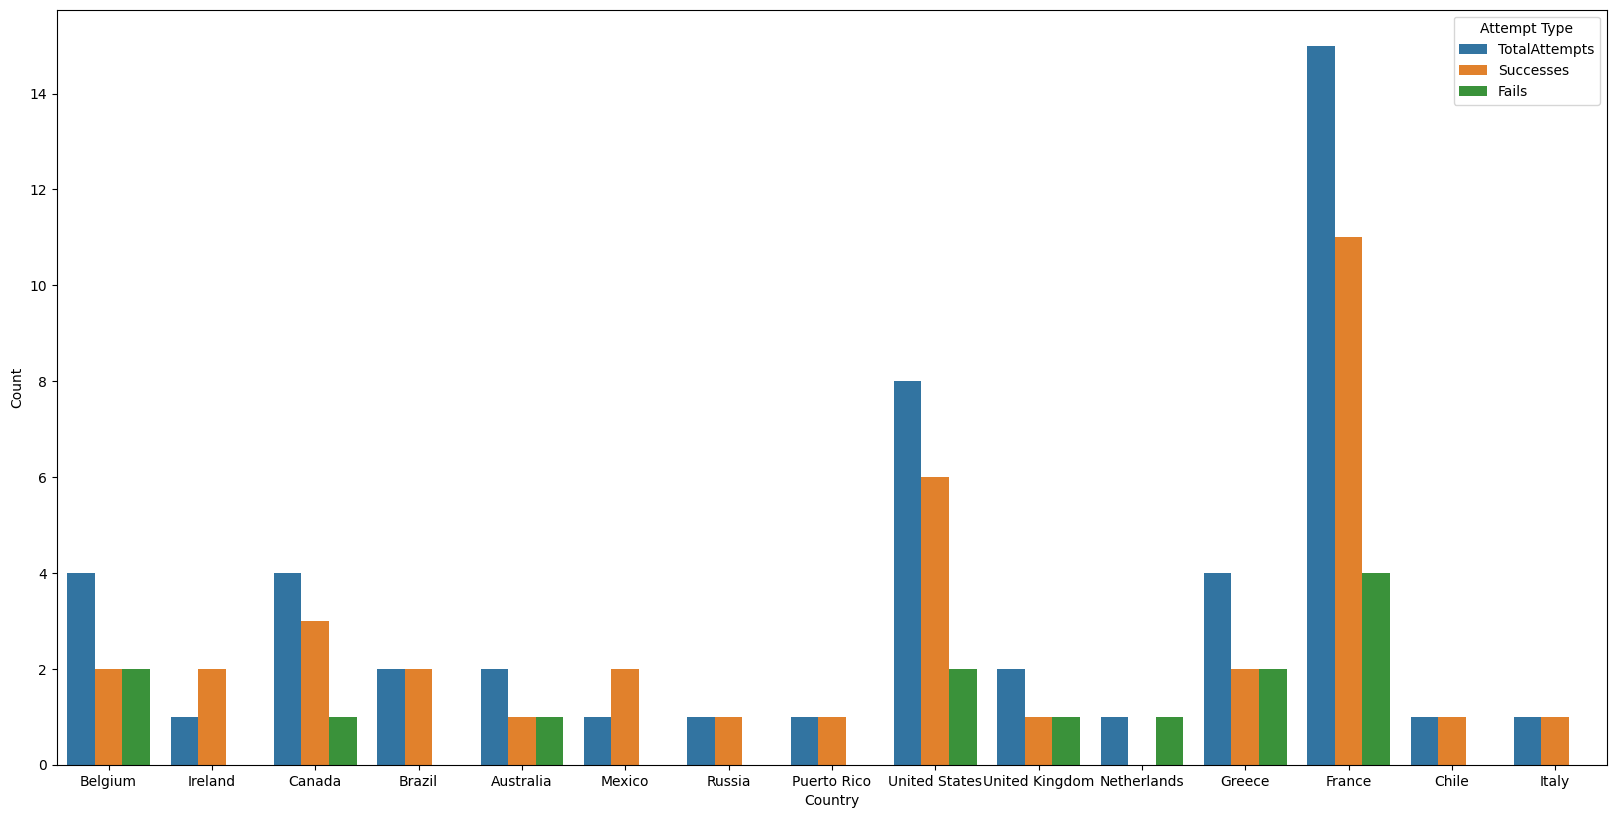

In [47]:
# plotdata.plot(kind = "bar", figsize = (15,10))
# plt.title("Escape Attempts per Country")
# plt.xlabel("Country")
# plt.ylabel("Escape Attempts")
# plt.show()

fig, ax = plt.subplots(figsize=(20, 10))
# sns.barplot(x='Country', y='TotalAttempts', data=plotdata, ax=ax)

# ax.set_title('Total Attempts by Country')
# ax.set_xlabel('Country')
# ax.set_ylabel('Total Attempts')
# plt.show()


df_melted = pd.melt(plotdata, id_vars=['Country'], var_name='Attempt Type', value_name='Count')
sns.barplot(x='Country', y='Count', hue='Attempt Type', data=df_melted, ax = ax)
plt.show()


In [45]:
print(df)

           Country  TotalAttempts  Successes  Fails
0          Belgium              4          2      2
1          Ireland              1          2      0
2           Canada              4          3      1
3           Brazil              2          2      0
4        Australia              2          1      1
5           Mexico              1          2      0
6           Russia              1          1      0
7      Puerto Rico              1          1      0
8    United States              8          6      2
9   United Kingdom              2          1      1
10     Netherlands              1          0      1
11          Greece              4          2      2
12          France             15         11      4
13           Chile              1          1      0
14           Italy              1          1      0


#### Red bar denotes the sucess out of total attempts (blue bar) and observing all bars we can say that US has may have the high sucess of escaping. Although, there are countries where the attempted escape has been successful but the number of attempts are very little.

In [48]:
data

[[1971,
  'Santa Martha Acatitla',
  'Mexico',
  'Yes',
  'Joel David Kaplan Carlos Antonio Contreras Castro'],
 [1973,
  'Mountjoy Jail',
  'Ireland',
  'Yes',
  "JB O'Hagan Seamus TwomeyKevin Mallon"],
 [1978,
  'United States Penitentiary, Marion',
  'United States',
  'No',
  'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson'],
 [1981,
  'Fleury-Mérogis, Essonne, Ile de France',
  'France',
  'Yes',
  'Gérard DupréDaniel Beaumont'],
 [1981,
  'Orsainville Prison, Quebec City',
  'Canada',
  'No',
  'Marina Paquet (hijacker)Giles Arseneault (prisoner)'],
 [1983, 'Pentridge (HM Prison)', 'Australia', 'No', 'David McMillan'],
 [1985,
  'Perry Correctional Institution, Pelzer, South Carolina',
  'United States',
  'Yes',
  'James Rodney LeonardWilliam Douglas BallewJesse Glenn Smith'],
 [1985,
  'Cândido Mendes penitentiary, Ilha Grande, Rio de Janeiro',
  'Brazil',
  'Yes',
  'José Carlos dos Reis Encina, a.k.a. "Escadinha"'],
 [1986, 'Prison de la Santé', 'France', 'Y